<center>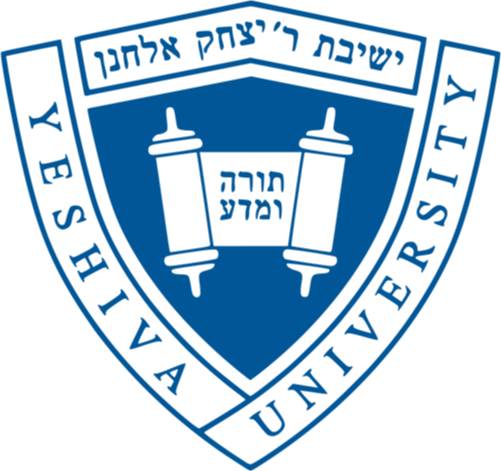</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5007 Neural Networks and Deep Learning</h1>
<p>
<h2 style='text-align: center;'>Homework 04</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# Package import

In [1]:
# Import some important packages here
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1. Calculate Image gradient of tiger image (20 points)

- read and show the tiger image

In [2]:
# Read image
im_t = cv.imread('./data/tiger.png', 0).astype(np.float64)

# Resize / Change its dimensions
im_t = cv.resize(im_t, (480,320))

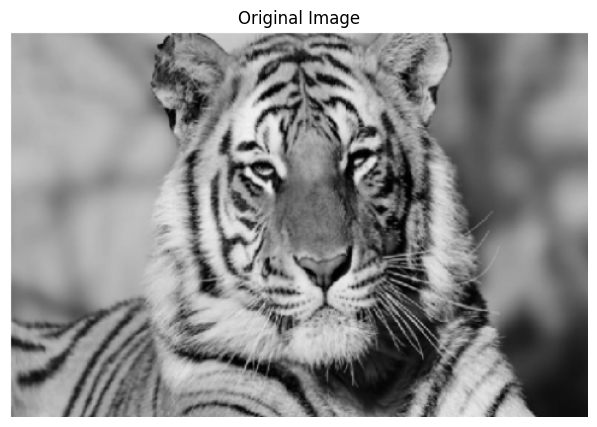

In [3]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(im_t, 'gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

- show the gradient of x and y, respectively

In [4]:
# Roberts Kernels

# Mask for ∂f/∂x
maskX = np.array([[1, 0], [0, -1]])

# Mask for ∂f/∂y
maskY = np.array([[0, 1], [-1, 0]])

In [5]:
# # Image derivative in x direction
derX = cv.filter2D(src = im_t, ddepth = cv.CV_64F, kernel = maskX)

# # Image derivative in y direction
derY = cv.filter2D(src = im_t, ddepth = cv.CV_64F, kernel = maskY)

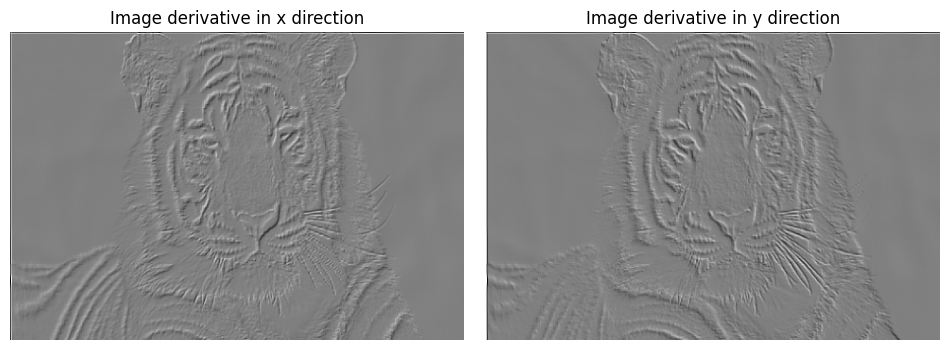

In [6]:
# Show images
images = [derX, derY]
titles = ["Image derivative in x direction","Image derivative in y direction"]

plt.figure(figsize = (12, 4))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], 'gray', aspect="auto")
    plt.title(titles[i])
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.05)

plt.show()

In [7]:
# Gradient Magnitude
# Find magnitude and angle
[Gmag, Gdir] = np.sqrt(derX**2 + derY**2), np.arctan2(derX, derY) * (180 / np.pi)

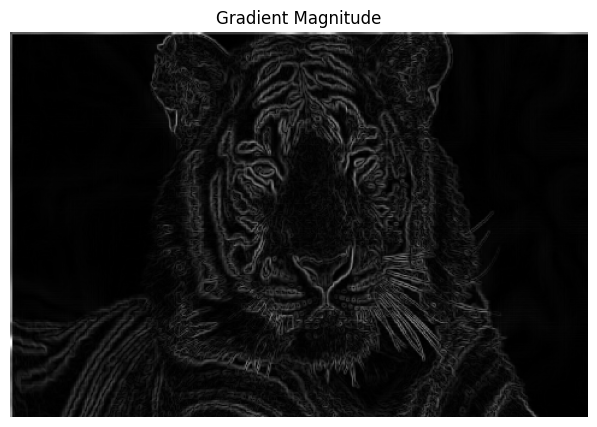

In [8]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(Gmag, 'gray')
plt.title("Gradient Magnitude")
plt.axis('off')
plt.show()

# 2. Implement Sobel edge detection of bird image (30 points)

- read and show the bird image

In [9]:
# Read image
im_b = cv.imread('./data/bird.png', 0).astype(np.float64)

# Resize / Change its dimensions
im_b = cv.resize(im_b, (480,320))

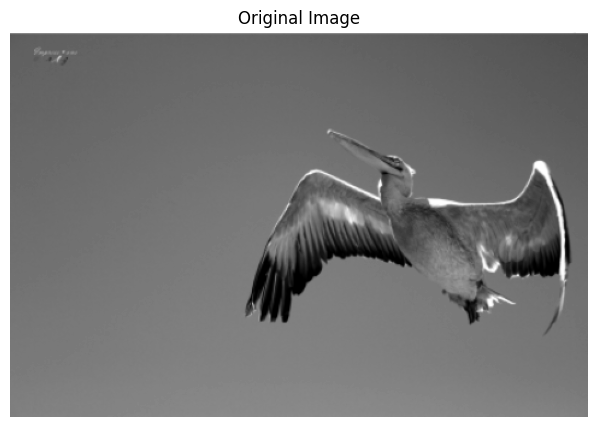

In [10]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(im_b, 'gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

- show the gradient of x and y, respectively

In [11]:
# # Image derivative in x direction
derX = cv.Sobel(im_b, ddepth = cv.CV_64F, dx = 1, dy = 0, ksize = 3)

# Image derivative in y direction
derY = cv.Sobel(im_b, ddepth = cv.CV_64F, dx = 0, dy = 1, ksize = 3)

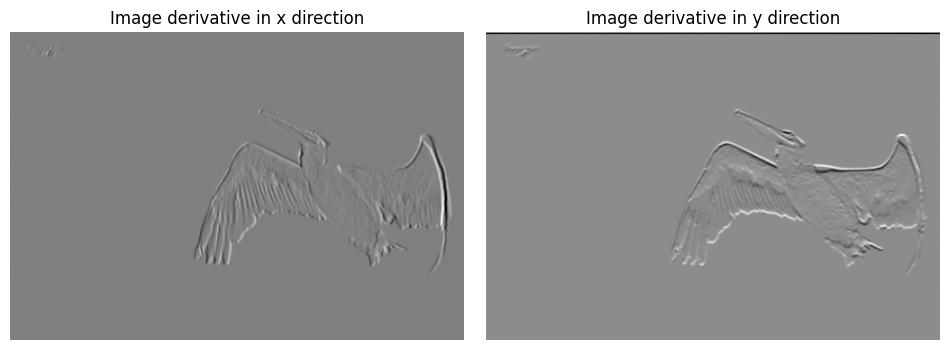

In [12]:
# Show images
images = [derX, derY]
titles = ["Image derivative in x direction", "Image derivative in y direction"]

plt.figure(figsize = (12, 4))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], 'gray', aspect="auto")
    plt.title(titles[i])
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.05)

plt.show()

- show gradient magnitude

In [13]:
# Gradient Magnitude
# Find magnitude and angle
[Gmag, Gdir] = np.sqrt(derX**2 + derY**2), np.arctan2(derX, derY) * (180 / np.pi)

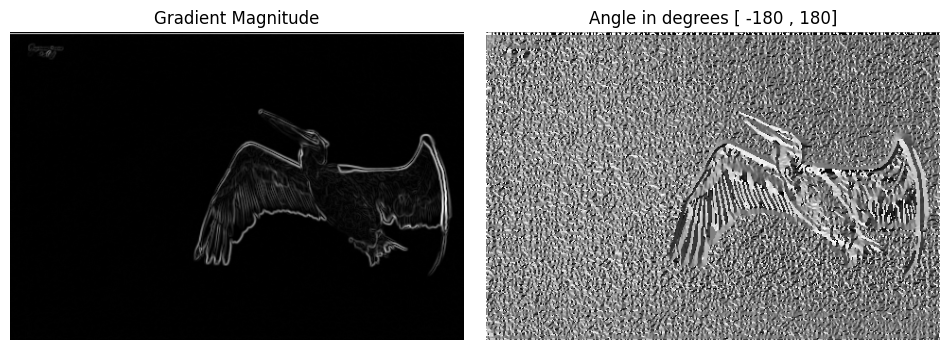

In [14]:
# Show images
images = [Gmag, Gdir]
titles = ["Gradient Magnitude", "Angle in degrees [ -180 , 180]"]

plt.figure(figsize = (12, 4))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    if i == 0:
        plt.imshow(images[i] / (4 * np.sqrt(2) ), 'gray', aspect="auto")
    else:
        plt.imshow((images[i] + 180.0) / 360.0, 'gray', aspect="auto")
    plt.title(titles[i])
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.05)

plt.show()

- show results of different thresholds

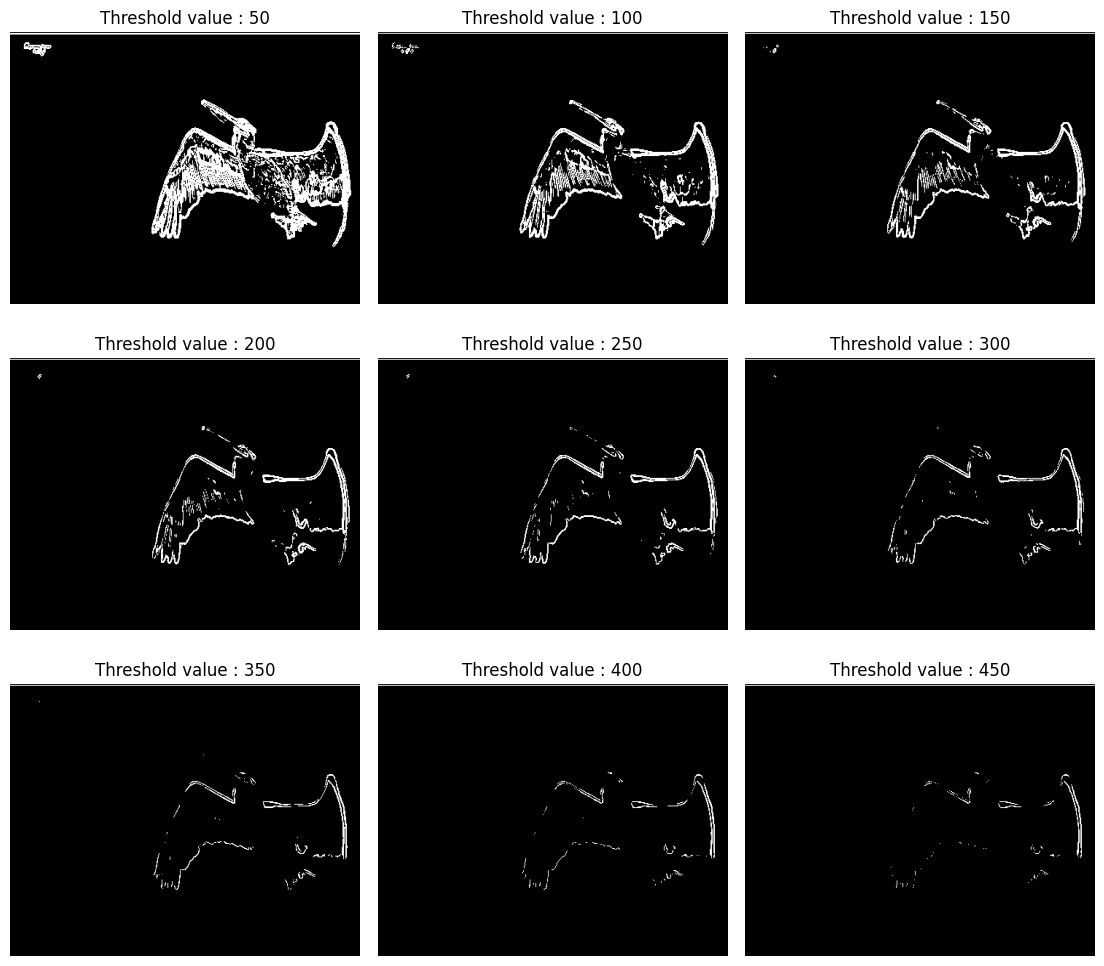

In [15]:
plt.figure(figsize = (14, 12))
for idx, value in enumerate(range(50,451,50)):
    binaryImage = Gmag > value
    plt.subplot(3, 3, idx+1)
    plt.imshow(binaryImage, 'gray', aspect="auto")
    plt.title(f"Threshold value : {value}")
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.05)

plt.show()

# 3. Implement LOG edge detection of bird image (20 points)

- read and show the bird image

In [16]:
# Read image
im_b = cv.imread('./data/bird.png', 0).astype(np.float64)

# Resize / Change its dimensions
im_b = cv.resize(im_b, (480,320))

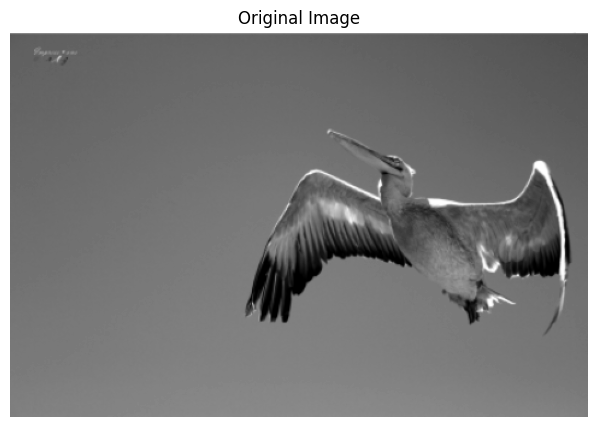

In [17]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(im_b, 'gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

- show results of LOG edge detection

In [18]:
# Apply Gaussian smoothing to the image
img_blur = cv.GaussianBlur(im_b, (7, 7), 1)

In [19]:
# Apply the Laplacian filter to the smoothed image
laplacian = cv.Laplacian(img_blur, cv.CV_64F)

In [20]:
# Apply thresholding to the Laplacian image
thresh = 0.1 * laplacian.max()
laplacian[laplacian < thresh] = 0

In [21]:
binaryImage = laplacian > 2

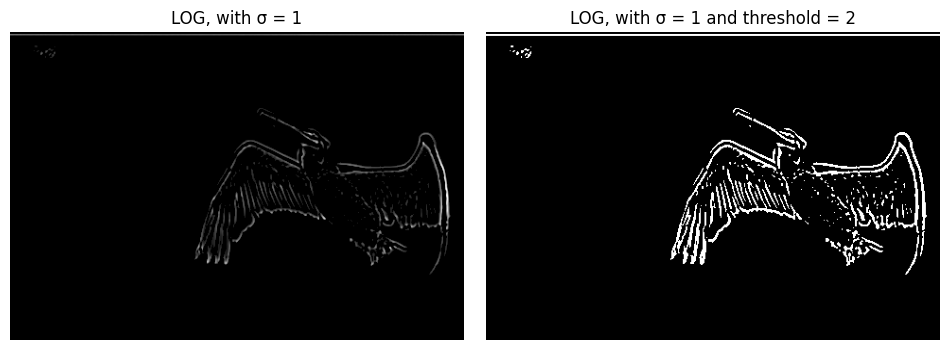

In [22]:
# Show images
images = [laplacian, binaryImage]
titles = ["LOG, with σ = 1", "LOG, with σ = 1 and threshold = 2"]

plt.figure(figsize = (12, 4))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], 'gray', aspect="auto")
    plt.title(titles[i])
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.05)

plt.show()

# 4. Implement Canny edge detection of bird image (20 points)

- show results of Canny edge detection

In [23]:
# Read image
im_b = cv.imread('./data/bird.png', 0)

# Resize / Change its dimensions
im_b = cv.resize(im_b, (480,320))

In [24]:
# Apply Gaussian smoothing to the image
img_blur = cv.GaussianBlur(im_b, (3, 3), 0)

In [25]:
# Apply Canny edge detection to the smoothed image
edges = cv.Canny(img_blur, 5, 50)

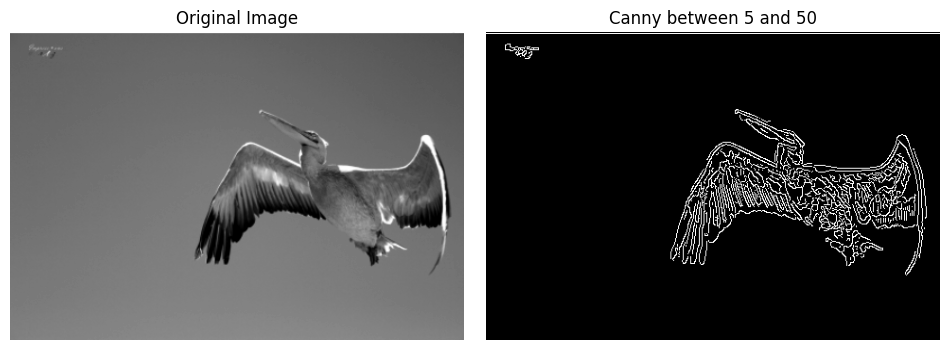

In [26]:
# Show images
images = [im_b, edges]
titles = ["Original Image", "Canny between 5 and 50"]

plt.figure(figsize = (12, 4))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], 'gray', aspect="auto")
    plt.title(titles[i])
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.05)

plt.show()

# 5. Given Gaussian function: $g(x,y) = \frac{1}{\sqrt{2\pi}\sigma} e^{(-\frac{x^2 + y^2}{2\sigma^2})}$ , calculate $\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2}$ 
# (10 points)

(You can search for how to use LaTex to write equations if you don't know how to write.)

First we calculate the first derivatives:

$
\frac{\partial g}{\partial x} = \frac{1}{\sqrt{2 \pi} \sigma} \frac{\partial}{\partial x}(e^{- \frac{x^2 + y^2}{2 \sigma^2}}) = \frac{1}{\sqrt{2 \pi} \sigma} \frac{\partial}{\partial x}(- \frac{x^2 + y^2}{2 \sigma^2}) e^{- \frac{x^2 + y^2}{2 \sigma^2}} = \frac{1}{\sqrt{2 \pi} \sigma} (- \frac{2x}{2 \sigma^2}) e^{- \frac{x^2 + y^2}{2 \sigma^2}} = \frac{1}{\sqrt{2 \pi} \sigma^3} (- x) e^{- \frac{x^2 + y^2}{2 \sigma^2}} = - \frac{1}{\sqrt{2 \pi} \sigma^3} x  e^{- \frac{x^2 + y^2}{2 \sigma^2}}
$

$
\frac{\partial g}{\partial y} = - \frac{1}{\sqrt{2 \pi} \sigma^3} y  e^{- \frac{x^2 + y^2}{2 \sigma^2}}
$

Now we calculate the second derivative:

$
\frac{\partial^2 g}{\partial x^2}  = - \frac{1}{\sqrt{2 \pi} \sigma^3} \frac{\partial}{\partial x} (x  e^{- \frac{x^2 + y^2}{2 \sigma^2}}) = - \frac{1}{\sqrt{2 \pi} \sigma^3} (\frac{\partial}{\partial x}(x) \cdot e^{- \frac{x^2 + y^2}{2 \sigma^2}} + x \cdot \frac{\partial}{\partial x}(e^{- \frac{x^2 + y^2}{2 \sigma^2}})  ) = - \frac{1}{\sqrt{2 \pi} \sigma^3} (e^{- \frac{x^2 + y^2}{2 \sigma^2}} - \frac{x^2}{\sigma^2}e^{- \frac{x^2 + y^2}{2 \sigma^2}}  ) = - \frac{1}{\sqrt{2 \pi} \sigma^3} (1 \cdot\frac{\sigma^2}{\sigma^2} - \frac{x^2}{\sigma^2} )e^{- \frac{x^2 + y^2}{2 \sigma^2}}  = - \frac{1}{\sqrt{2 \pi} \sigma^5} (\sigma^2 - x^2 )e^{- \frac{x^2 + y^2}{2 \sigma^2}} = \frac{1}{\sqrt{2 \pi} \sigma^5} (x^2 - \sigma^2)  e^{- \frac{x^2 + y^2}{2 \sigma^2}}
$

$
\frac{\partial^2 g}{\partial y^2} = \frac{1}{\sqrt{2 \pi} \sigma^5} (y^2 - \sigma^2)  e^{- \frac{x^2 + y^2}{2 \sigma^2}}
$

In this step, we add the second derivatives:

$$
\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2g}{\partial y^2} = \frac{1}{\sqrt{2\pi}\sigma^5} (x^2 + y^2 - 2 \sigma^2) e^{-\frac{x^2+y^2}{2\sigma^2}}
$$

# References

- Roberts Cross Edge Detection and Implementing in Matlab : https://a-gorkemunuvar.medium.com/robets-edge-detection-and-applyig-in-matlab-479981144a12

- Image Gradients with OpenCV : https://pyimagesearch.com/2021/05/12/image-gradients-with-opencv-sobel-and-scharr/

- Imgradient matlab equivalent in Python : https://stackoverflow.com/questions/47835138/imgradient-matlab-equivalent-in-python

- Python OpenCV – Canny() Function : https://www.geeksforgeeks.org/python-opencv-canny-function/

- Chain rule : https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/a/chain-rule-review